# From Newton’s Method to Gradient Descent in Multivariate Optimization

**Objective:**  
To visualize the convergence paths of **Gradient Descent** and **Newton’s Method** on a 2-variable quadratic function.

---

### Function Definition

We consider:

\[
f(x, y) = x^2 + 2y^2 - xy - 4x - 3y
\]

- The function is convex (its Hessian is positive definite).  
- The minimum can be found analytically or iteratively using:
  - **Gradient Descent:** \( \mathbf{x}_{n+1} = \mathbf{x}_n - \eta \nabla f(\mathbf{x}_n) \)
  - **Newton’s Method:** \( \mathbf{x}_{n+1} = \mathbf{x}_n - H^{-1}\nabla f(\mathbf{x}_n) \)

where \( H \) is the Hessian matrix.

---


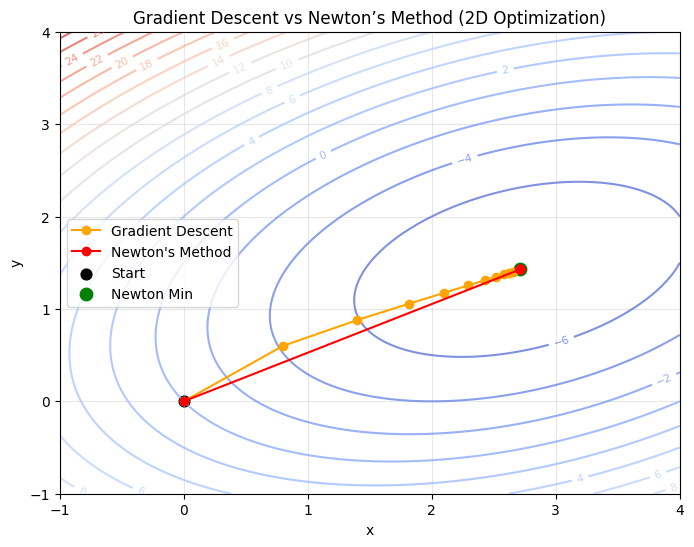

Final GD point ≈ (2.652, 1.403)
Final Newton point ≈ (2.714, 1.429)


In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Define the function and its derivatives
def f(x, y):
    return x**2 + 2*y**2 - x*y - 4*x - 3*y

def grad_f(x, y):
    """Gradient vector ∇f"""
    df_dx = 2*x - y - 4
    df_dy = 4*y - x - 3
    return np.array([df_dx, df_dy])

def hessian_f(x, y):
    """Hessian matrix Hf"""
    return np.array([[2, -1],
                     [-1, 4]])

# Parameters
eta = 0.2
iterations = 10
start = np.array([0.0, 0.0])  # starting point

# Containers for paths
gd_path = [start]
newton_path = [start]

x_gd = start.copy()
x_nm = start.copy()

# Run iterations
for i in range(iterations):
    # Gradient Descent
    grad = grad_f(x_gd[0], x_gd[1])
    x_gd = x_gd - eta * grad
    gd_path.append(x_gd)
    
    # Newton's Method
    grad = grad_f(x_nm[0], x_nm[1])
    hess_inv = np.linalg.inv(hessian_f(x_nm[0], x_nm[1]))
    x_nm = x_nm - hess_inv.dot(grad)
    newton_path.append(x_nm)

gd_path = np.array(gd_path)
newton_path = np.array(newton_path)

# Create a meshgrid for contour plot
x = np.linspace(-1, 4, 200)
y = np.linspace(-1, 4, 200)
X, Y = np.meshgrid(x, y)
Z = f(X, Y)

# Plot the contours
plt.figure(figsize=(8,6))
contours = plt.contour(X, Y, Z, levels=20, cmap='coolwarm', alpha=0.7)
plt.clabel(contours, inline=True, fontsize=8)

# Plot the paths
plt.plot(gd_path[:,0], gd_path[:,1], 'o-', color='orange', label='Gradient Descent')
plt.plot(newton_path[:,0], newton_path[:,1], 'o-', color='red', label='Newton\'s Method')

plt.scatter([gd_path[0,0]], [gd_path[0,1]], color='black', label='Start', s=60)
plt.scatter([newton_path[-1,0]], [newton_path[-1,1]], color='green', label='Newton Min', s=80)

plt.title("Gradient Descent vs Newton’s Method (2D Optimization)")
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.grid(alpha=0.3)
plt.show()

print(f"Final GD point ≈ ({gd_path[-1,0]:.3f}, {gd_path[-1,1]:.3f})")
print(f"Final Newton point ≈ ({newton_path[-1,0]:.3f}, {newton_path[-1,1]:.3f})")
